In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as cm
from subf16_model import subf16_model
from trimmerFun import trimmerFun
from getLinF16 import getLinF16, get_lon_A, get_lon_B, get_lat_A, get_lat_B
from RK4 import RK4
from util import print_matrix, print_array

In [2]:
# states =    Vt  alpha  beta  phi theta psi   p     q    r    xe    ye   ze   power
x = np.array([500, 0.5,  -0.2, -1,   1,  -1,  0.7, -0.8, 0.9, 1000, 900, 10000, 90])

# controls =   dt  de   da   dr
u = np.array([0.9, 20, -15, -20])

# x_dot
x_dot = subf16_model(x, u, Xcg=0.40)[0]

print("x_dot = ")
print_array(x_dot)

x_dot = 
[
-75.2372319122857,
-0.8813490800202292,
-0.4759989941875055,
2.5057346157773357,
0.3250820416325951,
2.145926179723922,
12.655632791325479,
0.964966917792276,
0.5814248097258479,
342.44390305237005,
-266.77068149494636,
248.12411562961984,
-58.69,
]


In [3]:
# Trim => Steady Level Flight
                    
#                Vt      h   gamma  turn_rate  pull_rate
inputs = np.array([500, 0.0,  0.0,    0.0,       0.0])

Xcg = 0.35   # C.G. Location

printOn=False

orient = 1   # Steady level flight (gamma = 0)

x_trim, u_trim = trimmerFun(orient, inputs, printOn, Xcg)

print("\ntrimmed_state = ")
print_array(x_trim)
print("\ntrimmed_control = ")
print_array(u_trim)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 423
         Function evaluations: 758

trimmed_state = 
[
500.0,
0.03752667058125627,
0.0,
0.0,
0.03752667058125627,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
8.929654371592225,
]

trimmed_control = 
[
0.1375062268492797,
-0.7558957121026701,
0.0,
0.0,
]


In [4]:
# Trim => Steady Climbing Flight
                    
#                Vt      h   gamma  turn_rate  pull_rate
inputs = np.array([500, 0.0,  0.5,    0.0,       0.0])

Xcg = 0.35   # C.G. Location

printOn=False

orient = 2   # Steady climbing flight (gamma != 0)

x_trim, u_trim = trimmerFun(orient, inputs, printOn, Xcg)

print("\ntrimmed_state = ")
print_array(x_trim)
print("\ntrimmed_control = ")
print_array(u_trim)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 241
         Function evaluations: 442

trimmed_state = 
[
500.0,
0.037503691615615994,
0.0,
0.0,
0.046230337876057105,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
0.0,
9.626502554004626,
]

trimmed_control = 
[
0.14823687332929822,
-0.756003354835421,
0.0,
0.0,
]


In [5]:
# Trim => Coordinated Turn
                    
#                Vt      h   gamma     turn_rate       pull_rate
inputs = np.array([500, 0.0,  0.0,   0.3*57.29577951,     0.0])

Xcg = 0.30   # C.G. Location

printOn=False

orient = 3   # Coordinated Turn

x_trim, u_trim = trimmerFun(orient, inputs, printOn, Xcg)

print("\ntrimmed_state = ")
print_array(x_trim)
print("\ntrimmed_control = ")
print_array(u_trim)

Optimization terminated successfully.
         Current function value: 0.019028
         Iterations: 976
         Function evaluations: 1610

trimmed_state = 
[
500.0,
0.2495128513932786,
0.0,
1.3595299918575168,
0.053385178803301306,
0.0,
-0.01600794739752274,
0.29291195272642284,
0.06281985012806018,
0.0,
0.0,
0.0,
67.34999741791358,
]

trimmed_control = 
[
0.8498021778356499,
-6.255568756573048,
0.13144568857435324,
-0.5161122495020781,
]


In [6]:
# Trim => Pull up maneuver
                    
#                Vt      h   gamma  turn_rate       pull_rate
inputs = np.array([500, 0.0,  0.0,    0.0,       0.3*57.29577951])

Xcg = 0.30   # C.G. Location

printOn=False

orient = 4   # Pull up maneuver

x_trim, u_trim = trimmerFun(orient, inputs, printOn, Xcg)

print("\ntrimmed_state = ")
print_array(x_trim)
print("\ntrimmed_control = ")
print_array(u_trim)

Optimization terminated successfully.
         Current function value: 0.002422
         Iterations: 446
         Function evaluations: 826

trimmed_state = 
[
500.0,
0.3034284849787938,
0.0,
0.0,
0.3034284849787938,
0.0,
0.0,
0.3,
0.0,
0.0,
0.0,
0.0,
105.97191418852609,
]

trimmed_control = 
[
1.0274722338233788,
-7.132825196496029,
0.0,
0.0,
]


In [7]:
# Linearization => coordinated turn flight

inputs = [500, 0.0, 0.0, 0.3*57.29577951, 0.0]  # for coordinated turn
xcg = 0.3
orient = 3
printOn = False
A, B = getLinF16(orient, inputs, xcg, printOn, C_and_D=False)

print("\nA = ")
print_matrix(A)
print("\nB = ")
print_matrix(B)

Optimization terminated successfully.
         Current function value: 0.019028
         Iterations: 976
         Function evaluations: 1610

A = 
[
[-0.090761	-169.274927	25.173725	-7.761707	-31.218261	0.000000	-0.000000	-7.749127	0.000000	0.000000	0.000000	0.000108	0.317982	]
[-0.000536	-1.048732	0.006351	-0.060918	0.015165	0.000000	-0.000000	0.903342	0.000000	0.000000	0.000000	0.000009	-0.000162	]
[-0.000126	0.000162	-0.322078	0.013259	-0.003365	0.000000	0.248867	0.000000	-0.960869	0.000000	0.000000	-0.000000	0.000000	]
[0.000000	0.000000	0.000000	-0.000054	0.300432	0.000000	1.000000	0.052248	0.011205	0.000000	0.000000	0.000000	0.000000	]
[0.000000	0.000000	0.000000	-0.299570	0.000000	0.000000	-0.000000	0.209698	-0.977766	0.000000	0.000000	0.000000	0.000000	]
[0.000000	0.000000	0.000000	-0.001020	0.016071	0.000000	-0.000000	0.979161	0.209997	0.000000	0.000000	0.000000	0.000000	]
[-0.000280	0.115504	-67.245653	0.000000	0.000000	0.000000	-3.178846	-0.048550	1.634322	0.000000	0.000000	

Optimization terminated successfully.
         Current function value: 0.018784
         Iterations: 1449
         Function evaluations: 2349


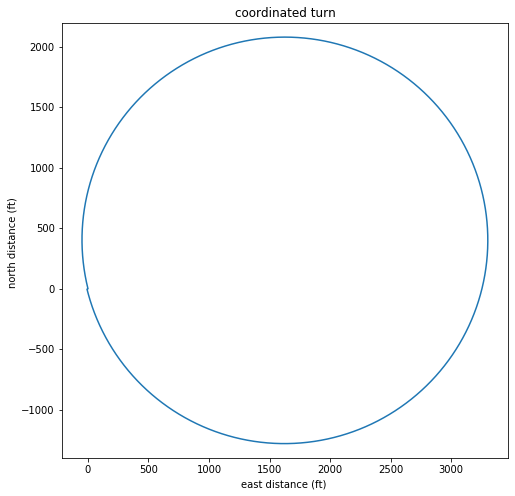

In [8]:
## Non-Linear Simulation => Coordinated turn

# initial conditions (coordinated turn trimming values)
inputs = np.array([502.0 , 0.0, 0.0, 0.3*57.29577951, 0.0 ])
printOn = False
xcg = 0.30
orient = 3   # coordinated turn
x_co, u_co = trimmerFun(orient, inputs, printOn, Xcg=xcg)

x = x_co   # initial condition for nonlinear simulation
u = u_co   # initial control inputs

n = len(x)
m = len(u)

RTOD = 57.29578   # rad to degree
runtime = 21  # sec
dt = 0.01   # time step
N = int(runtime/dt)   # total number of steps for integration
k = 0
NP = 1
time = 0

# initialize oputput array
y = np.zeros((N,n), dtype=float)

# simulate over time
for i in range(0, N-1):
    time = i*dt
    if i % NP ==0:
        k += 1
        y[k,0] = x[0]    # record data as needed
        y[k,1] = x[1]
        y[k,2] = x[2]
        y[k,3] = x[3]
        y[k,4] = x[4]
        y[k,5] = x[5]
        y[k,6] = x[6]
        y[k,7] = x[7]
        y[k,8] = x[8]
        y[k,9] = x[9]
        y[k,10] = x[10]
        y[k,11] = x[11]
        y[k,12] = x[12]

    # integration step
    x = RK4(subf16_model, time, dt, x, u, xcg)
    
# plotting the coordinated turn (from top view)
t = NP*dt*np.arange(0,k+1)
plt.figure("Non-linear simulation of coordinated turn", figsize=(8,8))
plt.plot(y[:,10], y[:,9])
plt.title("coordinated turn")
plt.xlabel("east distance (ft) ")
plt.ylabel("north distance (ft) ")
plt.axis("equal")
plt.show()

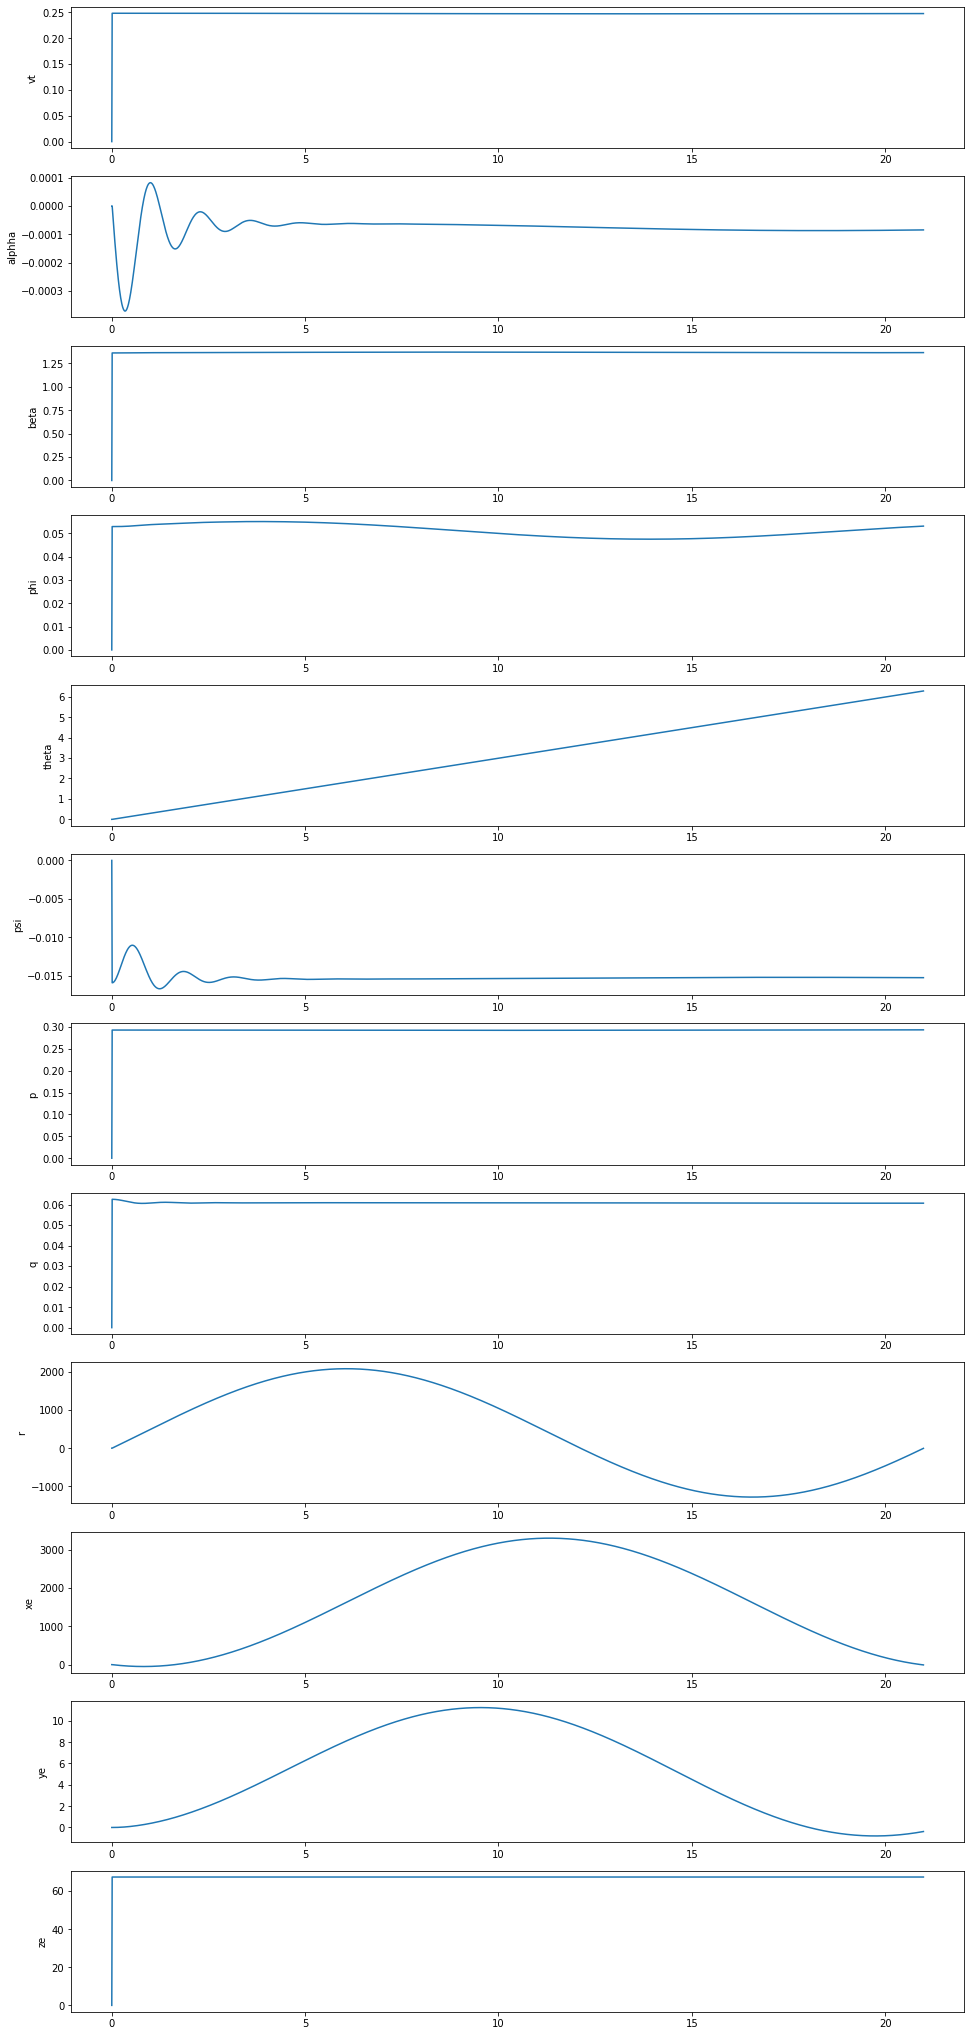

In [9]:
# plotting history of all states for nonlinear coordinated turn simuation
t = NP*dt*np.arange(0,k+1)
states_name = ["vt", "alphha", "beta", "phi", "theta", "psi", "p", "q", "r", "xe", "ye", "ze"]

plt.figure(figsize=(16,40))

for i in range(1, len(states_name)+1):
    plt.subplot(13, 1, i)
    plt.plot(t, y[:,i])
    plt.ylabel("time (sec)")
    plt.ylabel(states_name[i-1])

plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 367
         Function evaluations: 660


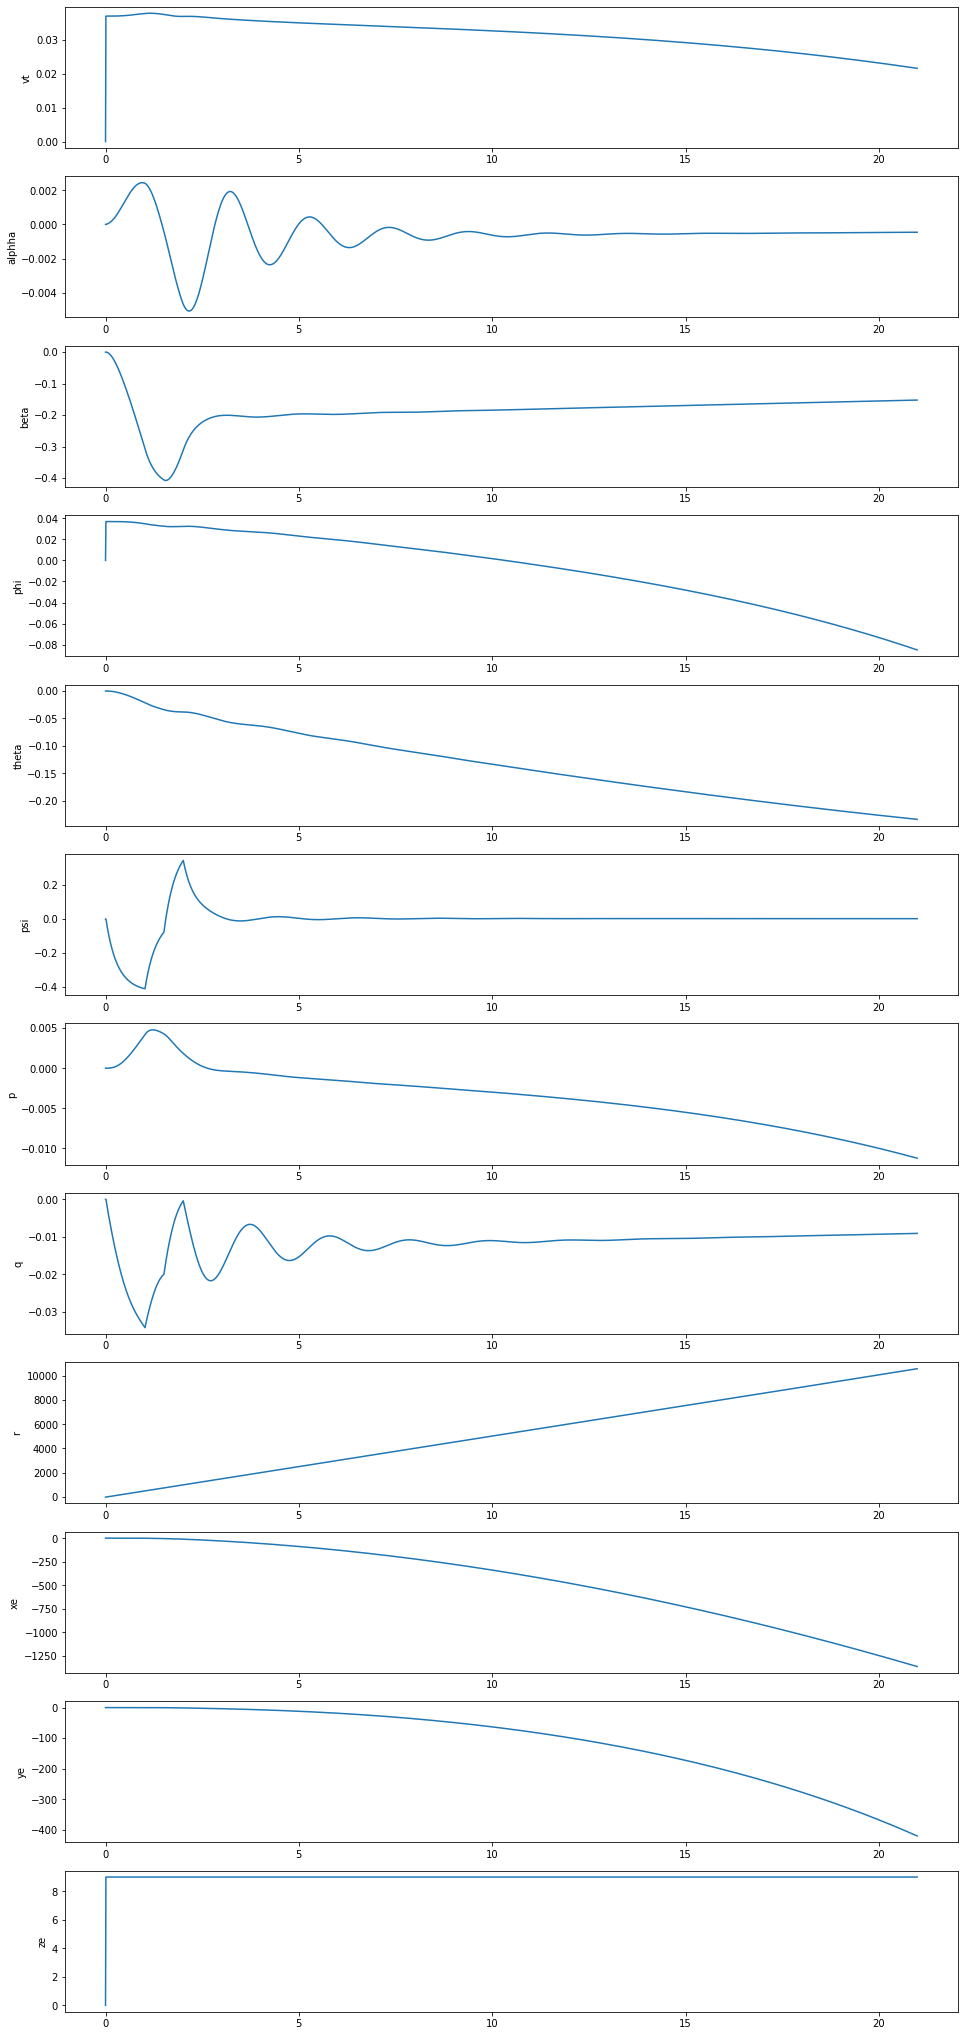

In [10]:
## Non-Linear Simulation => Elevator pulse in steady level flight

# initial conditions (steady level flight trimming values)
inputs = np.array([502.0 , 0.0, 0.0, 0.0, 0.0])
printOn = False
xcg = 0.35
orient = 1   # steady level flight
x_co, u_co = trimmerFun(orient, inputs, printOn, Xcg=xcg)

x = x_co   # initial condition for nonlinear simulation
u = u_co   # initial control inputs

n = len(x)
m = len(u)

RTOD = 57.29578   # rad to degree
runtime = 21  # sec
dt = 0.01   # time step
N = int(runtime/dt)   # total number of steps for integration
k = 0
NP = 1
time = 0

# initialize oputput array
y = np.zeros((N,n), dtype=float)

# for an elevator pulse
save = u[2]  # trim elevator input

# simulate over time
for i in range(0, N-1):
    time = i*dt
    if i % NP ==0:
        k += 1
        y[k,0] = x[0]    # record data as needed
        y[k,1] = x[1]
        y[k,2] = x[2]
        y[k,3] = x[3]
        y[k,4] = x[4]
        y[k,5] = x[5]
        y[k,6] = x[6]
        y[k,7] = x[7]
        y[k,8] = x[8]
        y[k,9] = x[9]
        y[k,10] = x[10]
        y[k,11] = x[11]
        y[k,12] = x[12]
        
    # elevator pulse
    if time >= 2:
        u[2] = save
    elif time >= 1.5:
        u[2] = save - 2
    elif time <= 1.0:
        u[2] = save + 2
    else:
        u[2] = save
        
    # integration step
    x = RK4(subf16_model, time, dt, x, u, xcg)
    
# plotting history of all states for nonlinear elevator pulse simuation
t = NP*dt*np.arange(0,k+1)
states_name = ["vt", "alphha", "beta", "phi", "theta", "psi", "p", "q", "r", "xe", "ye", "ze"]

plt.figure(figsize=(16,40))

for i in range(1, len(states_name)+1):
    plt.subplot(13, 1, i)
    plt.plot(t, y[:,i])
    plt.ylabel("time (sec)")
    plt.ylabel(states_name[i-1])

plt.show()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 423
         Function evaluations: 758

Pitch Rate to Elevator Transfer Function = 

  -0.1741 s^3 - 0.1813 s^2 - 0.003851 s - 1.735e-17
----------------------------------------------------
s^4 + 2.104 s^3 + 0.3899 s^2 + 0.008904 s - 0.006699



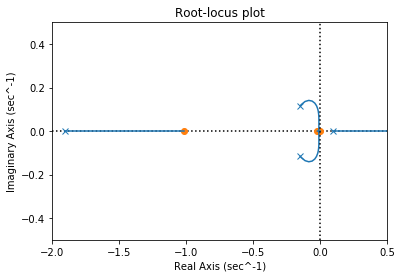

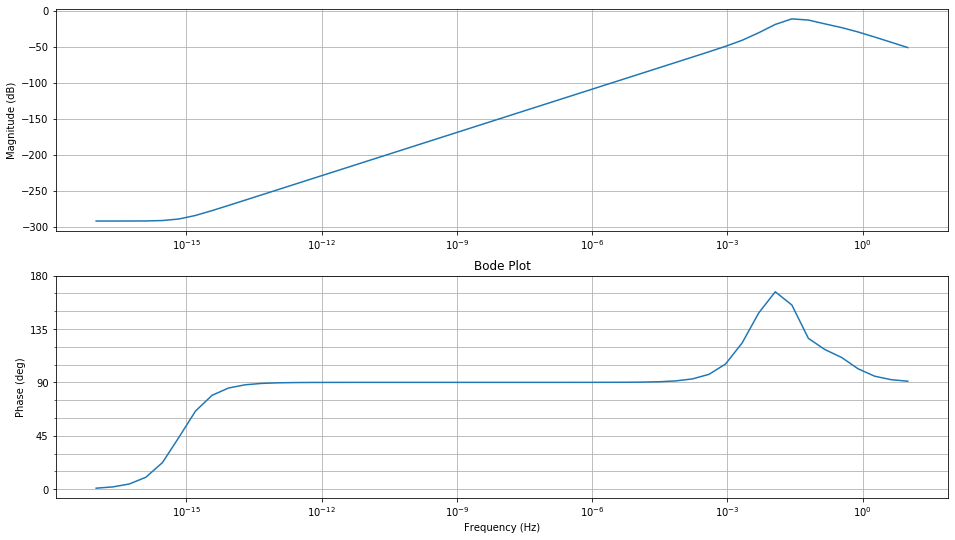

In [11]:
## Pitch Rate to Elevator Transfer Function

# Linearization => around steady level flight

inputs = [500, 0.0, 0.0, 0.0, 0.0]  # for steady level flight
xcg = 0.35
orient = 1
printOn = False
A, B = getLinF16(orient, inputs, xcg, printOn, C_and_D=False)

# using decoupled longitudinal equations
A_lon = get_lon_A(A)
B_lon = get_lon_B(B)

B_lon_de = B_lon[:, 1].reshape((4,1))  # elevator only

                # vt alpha theta q
C_lon = np.array([ 0,  0,    0,  1]).T

D = 0

q_de_tf = cm.ss2tf(A_lon,B_lon_de,C_lon,D)

print(f"\nPitch Rate to Elevator Transfer Function = \n{q_de_tf}")

# Root-locus plot
cm.rlocus(q_de_tf, Plot=True)
plt.title("Root-locus plot")
plt.xlabel("Real Axis (sec^-1)")
plt.ylabel("Imaginary Axis (sec^-1)")
plt.axis([-2, 0.5, -0.5, 0.5])
plt.show()
plt.show()

# Bode Plot
plt.figure(figsize=(16,9))
cm.bode(q_de_tf, Plot=True)
plt.title("Bode Plot")
plt.show()